In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline


In [142]:
data = pd.read_csv('Inspection_Results.csv')

def fix_space(data):
    """
    :param data: food inspection dataframe
    :return:food inspection dataframe with non space column name

    >>> df = pd.DataFrame(np.random.randn(3, 2),columns=[' Column A ', ' Column B '], index=range(3))
    >>> print(fix_space(df).columns.values)
    ['Column_A' 'Column_B']
    """
    data.columns = data.columns.str.strip().str.replace(' ', '_') # change space to '_' in column name
    return data

fix_space(data)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,VIOLATION_CODE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE,INSPECTION_TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,05/01/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,05/01/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,05/01/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,05/01/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,05/01/2019,Cycle Inspection / Initial Inspection
5,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,05/01/2019,Cycle Inspection / Initial Inspection
6,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,13.0,A,03/04/2019,05/01/2019,Cycle Inspection / Initial Inspection
7,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,13.0,A,03/04/2019,05/01/2019,Cycle Inspection / Initial Inspection
8,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/04/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,A,03/04/2019,05/01/2019,Cycle Inspection / Initial Inspection
9,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,03/13/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,03/13/2018,05/01/2019,Cycle Inspection / Initial Inspection


## The NYC Health Department inspects about 24,000 restaurants a year to monitor compliance with City and State food safety regulations. Since July 2010, the Health Department has required restaurants to post letter grades showing sanitary inspection results. Each violation earns a certain number of points. At the end of the inspection, the inspector totals the points and this number is the restaurant’s inspection score; the lower the score, the better. Restaurants with a score between 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28 or more a C. 

In [115]:
# Check missing data in GRADE column.  
data.GRADE.value_counts(dropna=False)

NaN               190145
A                 153396
B                  24234
C                   8034
Z                   3105
P                   2311
Not Yet Graded      2301
G                      7
Name: GRADE, dtype: int64

In [116]:
# drop rows with missing grade and borough values 
pd1=pd.crosstab(data.BORO, data.GRADE)
pd1['Sum']=pd1['A']+pd1['B']+pd1['C']+pd1['G']+pd1['P']+pd1['Z']
pd1=pd1.drop(index='Missing')
pd1=pd1.drop(columns=['Not Yet Graded'])
pd1

GRADE,A,B,C,G,P,Z,Sum
BORO,,,,,,,
BRONX,13825,2438,855,0,220,291,17629
BROOKLYN,37711,6320,2039,2,667,864,47603
MANHATTAN,61357,9199,3184,5,857,1089,75691
QUEENS,35038,5338,1704,0,500,770,43350
STATEN ISLAND,5411,930,246,0,67,91,6745


In [111]:
pd1

GRADE,A,B,C,G,P,Z,Sum
BORO,,,,,,,
BRONX,13825,2438,855,0,220,291,17629
BROOKLYN,37711,6320,2039,2,667,864,47603
MANHATTAN,61357,9199,3184,5,857,1089,75691
QUEENS,35038,5338,1704,0,500,770,43350
STATEN ISLAND,5411,930,246,0,67,91,6745


In [124]:

def create_grade_percentage_chart(df):
    """
    :param df: grade count per borough dataframe
    :return: grade percentage dataframe

    >>> df = pd.DataFrame({'A':[1,2,3,4],'B':[2,4,6,8],'Sum':[3,6,9,12]})
    >>> create_grade_percentage_chart(df)
          A%     B%
    0  33.33  66.67
    1  33.33  66.67
    2  33.33  66.67
    3  33.33  66.67
    """
    grade=df.columns.values
    chart=pd.DataFrame()
    for value in grade:
        if value !='Sum':
            chart[value+'%']=round(df[value]/df['Sum']*100,2)
    return chart
    

create_grade_percentage_chart(pd1)


,A%,B%,C%,G%,P%,Z%
BORO,,,,,,
BRONX,78.42,13.83,4.85,0.00,1.25,1.65
BROOKLYN,79.22,13.28,4.28,0.00,1.40,1.82
MANHATTAN,81.06,12.15,4.21,0.01,1.13,1.44
QUEENS,80.83,12.31,3.93,0.00,1.15,1.78
STATEN ISLAND,80.22,13.79,3.65,0.00,0.99,1.35


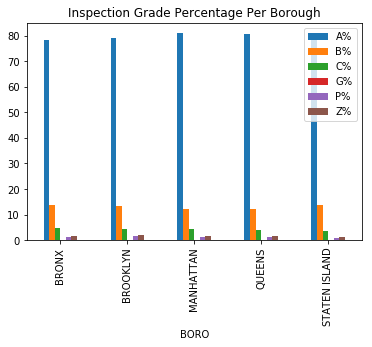

In [123]:
create_grade_percentage_chart(pd1).plot(kind='bar',title='Inspection Grade Percentage Per Borough')

# Top 10 most frequent Violation code

In [841]:
data.VIOLATION_CODE.value_counts(dropna=False).head(10)

10F    54091
08A    41351
04L    28575
06D    26131
06C    24989
10B    22747
02G    21969
02B    19958
04N    19454
04H     8081
Name: VIOLATION_CODE, dtype: int64

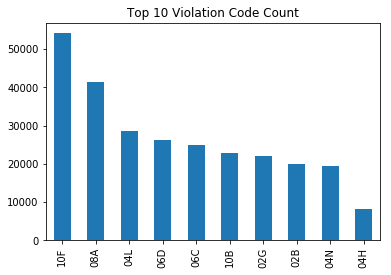

In [842]:
data.VIOLATION_CODE.value_counts(dropna=False).head(10).plot(kind='bar',title='Top 10 Violation Code Count')

## Compare top 10 most frequent violation code for NYC and different borough

In [134]:
def create_code_chart(data,top_num):
    """
    :param data: food inspection dataframe
    :param top_num: an integer indicates the top number of most frequent violation code
    :return:top number of most frequent violation code for NYC and different borough dataframe

    >>> df = data
    >>> print(create_code_chart(data, 1).values)
    [['10F' '10F' '10F' '10F' '10F' '10F']]
    >>> print(create_code_chart(data, 2).values)
    [['10F' '10F' '10F' '10F' '10F' '10F']
     ['08A' '08A' '08A' '08A' '08A' '08A']]

    """
    pd3=pd.crosstab(data.VIOLATION_CODE, data.BORO)
    pd3=fix_space(pd3)
    
    pd4=pd.DataFrame() 
    for boro in pd3.columns.values:
        if boro !='Missing':
            pd4[boro]=pd3.nlargest(top_num, [boro]) [boro].index
    pd4['NYC']=data.VIOLATION_CODE.value_counts(dropna=False).head(top_num).index
    
    return pd4
 
create_code_chart(data,10)

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND,NYC
0,10F,10F,10F,10F,10F,10F
1,08A,08A,08A,08A,08A,08A
2,04L,04L,06D,04L,06D,04L
3,02B,06C,04L,06C,04L,06D
4,10B,06D,06C,06D,02G,06C
5,04N,10B,10B,02G,06C,10B
6,06C,02G,02G,10B,10B,02G
7,06D,02B,04N,02B,02B,02B
8,02G,04N,02B,04N,04N,04N
9,04M,04M,04H,06E,04H,04H


## For all borough, the most common vialation codes are:
* 10F (Non-food contact surface improperly constructed)
* 08A (Facility not vermin proof)
* 04L(Evidence of mice or live mice present in facility's food and/or non-food areas)
* 06D (Food contact surface not properly washed, rinsed and sanitized after each use)
* 06C (Food not protected from potential source of contamination during storage, preparation, transportation, display or service)


## Top 10 most frequent violation code distribution per borough

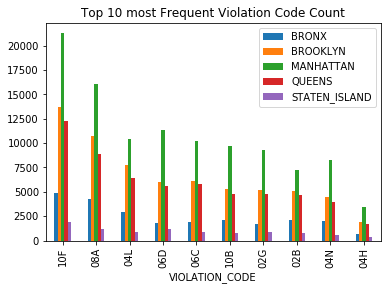

In [146]:
def code_count_chart(data,top_num):
    """
    :param data: food inspection dataframe
    :param top_num: an integer indicates the top number of most frequent violation code
    :return:top number of most frequent violation code count for NYC and different borough dataframe

    >>> df = data
    >>> print(code_count_chart(data, 1).values)
    [[ 4885 13667 21259 12252  1858]]
    >>> print(code_count_chart(data, 2).values)
    [[ 4885 13667 21259 12252  1858]
     [ 4289 10706 16042  8832  1216]]
    """
    pd3=pd.crosstab(data.VIOLATION_CODE, data.BORO)
    pd3=fix_space(pd3)
    pd3['All']=pd3['BRONX']+pd3['BROOKLYN']+pd3['MANHATTAN']+pd3['QUEENS']+pd3['STATEN_ISLAND']
    pd5=pd3.sort_values(by='All', ascending=0).head(top_num)
    
    pd6=pd.DataFrame()
    for boro in pd5.columns.values:
        if boro !='Missing'and boro!='All':
            pd6[boro]=pd5[boro]
    return pd6
 
code_count_chart(data,10).plot(kind='bar',title='Top 10 most Frequent Violation Code Count')


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


GRADE           A      B     C  G     P     Z  Total
GRADE_YEAR                                          
2012.0          2      0     0  0     0     0      2
2013.0          7      0     0  0     0     0      7
2014.0         47      3     5  0     0     0     55
2015.0       5261    850   194  0    48     0   6353
2016.0      34041   5498  1457  0   262     0  41258
2017.0      38671   5807  1768  0   665    17  46928
2018.0      55735  10102  3911  5  1223   276  71252
2019.0      19084   2006   620  0    84  2094  23888
                A%     B%    C%    G%    P%    Z%
GRADE_YEAR                                       
2012.0      100.00   0.00  0.00  0.00  0.00  0.00
2013.0      100.00   0.00  0.00  0.00  0.00  0.00
2014.0       85.45   5.45  9.09  0.00  0.00  0.00
2015.0       82.81  13.38  3.05  0.00  0.76  0.00
2016.0       82.51  13.33  3.53  0.00  0.64  0.00
2017.0       82.40  12.37  3.77  0.00  1.42  0.04
2018.0       78.22  14.18  5.49  0.01  1.72  0.39
2019.0       79.89  

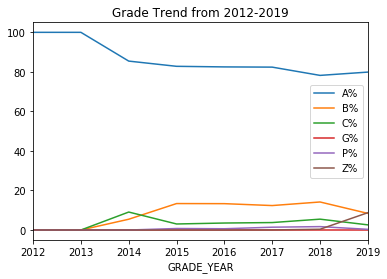

In [159]:
data = pd.read_csv('Inspection_Results.csv')
data=fix_space(data)

def grade_trend_chart(data):
    """
    :param data: food inspection dataframe
    :return: grade trend from 2012-2019 dataframe

    >>> data = pd.read_csv('/Users/ritazhao/Desktop/Inspection_Results.csv')
    >>> df=fix_space(data)
    >>> print(grade_trend_chart(df).values[0])
    [100.   0.   0.   0.   0.   0.]

    """

    pd7=pd.DataFrame()
    data['GRADE_DATE'] = pd.to_datetime(data['GRADE_DATE']).dt.year

    pd7['BORO']=data['BORO']
    pd7['GRADE']=data['GRADE']
    pd7['GRADE_YEAR']=data['GRADE_DATE']
    pd7=pd7.dropna()
    pd8=pd7.groupby(['BORO','GRADE','GRADE_YEAR']).size()
    pd8=pd.crosstab(pd7.GRADE_YEAR,pd7.GRADE)
    pd8=pd8.drop(columns=['Not Yet Graded'])
    pd8['Total'] = pd8.sum(axis=1)
    print(pd8)

    chart=pd.DataFrame()
    for grade in pd8.columns.values:
        if grade !='Total':
            chart[grade+'%']=round(pd8[grade]/pd8['Total']*100,2)
    print(chart)
    return chart


grade_trend_chart(data).plot(title='Grade Trend from 2012-2019')


## Assumption 1: Local non-chain restaurants perform worse in food inspection than chain restaurants on average 

In [171]:
pd9=pd.DataFrame()

pd9['DBA']=data['DBA']
pd9['GRADE_YEAR']=data['GRADE_DATE']
pd9['STREET']=data['STREET']
pd9=pd9.dropna()
pd10=pd9.groupby(['DBA','STREET']).count()

chain_list=[]
non_chain=[]
dba_list=pd9['DBA'].unique()
for value in dba_list:
    if pd10.loc[value].count().values[0]>1:
        chain_list.append(value)
    else:
        non_chain.append(value)
            
def grade_for_chain(data):
    """
    :param data: food inspection dataframe
    :return: grade count for all chain resturants dataframe

    >>> print(grade_for_chain(data).loc[['10 BELOW ICE CREAM'],['A']].values)
    [[17]]

    """
    pd11=pd.DataFrame()
    pd11['DBA']=data['DBA']
    pd11['GRADE']=data['GRADE']
    pd11=pd11.dropna()


    pd11=pd.crosstab(pd11.DBA,pd11.GRADE)
    pd11=pd11.drop(columns=['Not Yet Graded'])

    pd12=pd11

    # get a grade table for all chain resturants
    for index1, row in pd12.iterrows():
        if index1 in non_chain:
            pd12=pd12.drop(index=index1)
    pd12['Total'] = pd12.sum(axis=1)
    
    return pd12

def grade_for_non_chain(data):
    """
    :param data: food inspection dataframe
    :return: grade count for all non chain resturants dataframe

    >>> print(grade_for_non_chain(data).loc[['ZURILEE'],['A']].values)
    [[7]]

    """

    pd11=pd.DataFrame()
    pd11['DBA']=data['DBA']
    pd11['GRADE']=data['GRADE']
    pd11=pd11.dropna()


    pd11=pd.crosstab(pd11.DBA,pd11.GRADE)
    pd11=pd11.drop(columns=['Not Yet Graded'])
     
    # get a grade table for all non chain resturants   
    for index1, row in pd11.iterrows():
        if index1 in chain_list:
            pd11=pd11.drop(index1)
    pd11['Total'] = pd11.sum(axis=1)
   
    return pd11



    Chain  Non Chain
A%  85.84      78.92
B%   9.27      13.88
C%   3.17       4.51
G%   0.00       0.00
P%   0.93       1.29
Z%   0.78       1.41


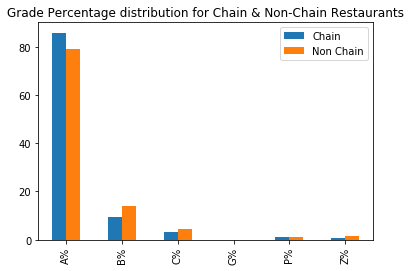

In [172]:
def chain_non_chain_compare(data):
    """
    :param data: food inspection dataframe
    :return: grade count percentage for non chain and chain resturants dataframe

    >>> print(chain_non_chain_compare(data).loc[['A%'],['Chain']].values)
    [[85.84]]

    """
    pd_non_chain=grade_for_non_chain(data)
    pd_chain=grade_for_chain(data)
    
    non_chain_grade_list=[]
    chain_grade_list=[]

    for grade in pd_non_chain.columns.values:
        if grade !='Total':
            non_chain_grade_list.append(round(pd_non_chain[grade].sum()/pd_non_chain['Total'].sum()*100,2))
            chain_grade_list.append(round(pd_chain[grade].sum()/pd_chain['Total'].sum()*100,2))
        
    df_chain_nonchain = pd.DataFrame(np.array([chain_grade_list,non_chain_grade_list]),columns=['A%', 'B%','C%','G%','P%','Z%'])

    plot=df_chain_nonchain.T
    plot.columns = ['Chain', 'Non Chain']
    print(plot)
    return plot
        


chain_non_chain_compare(data).plot(kind='bar',title="Grade Percentage distribution for Chain & Non-Chain Restaurants")

